**Problem Statement**

Our goal Natural language processing(NLP)to classify the Customer reviews on  variety of language-related tasks, including answering questions, classifying text in a variety of ways, and conversing with users.

In this project we applied sentiment analysis, machine learning techniques topic modelling and Deeplaerning techinques.

To address the problem at hand we need to do the following:


*   Data Prpcessomg
*  Stemming and lemmatization:
*   Sentence segmentation
*   Stop word removal [link text](https:// [link text](https://))
*   Tokenization 
*   Feature Extraction
*   TF-IDF
*   Word2Vec
*   Machine learning NLP techniques
    - Logistic regression
    - Naive Bayes 
    - Latent Dirichlet Allocation (LDA) 
*   Deep learning NLP Techniques: 
    - RNN









**Getting The Data**

The data provided available in our google drive 



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Import the Libraries**

In [ ]:
! pip install -U nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from nltk.parse.transitionparser import svm
#tokenize,#
%matplotlib inline

from nltk.corpus import stopwords
from nltk import word_tokenize    
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np



In [ ]:
# Step 1: Importing Libraries
  
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**Load and Read the data**

In [1]:
! ls '/content/drive/Shareddrives/test.csv'
!ls '/content/drive/Shareddrives//train.csv'

In [ ]:
from numpy.core.fromnumeric import shape
import pandas as pd
# load the dataset into dataframe.
reviews_train = pd.read_csv('/content/drive/Shareddrives/train.csv')
reviews_test = pd.read_csv('/content/drive/Shareddrive/test.csv')



In [ ]:
frames = [reviews_train , reviews_test]
reviews = pd.concat(frames)

In [ ]:
# reviews = pd.read_csv('/content/drive/Shareddrives/train.csv')
reviews.head()

,reviewText,label,id
0,"This is a rare book, informative and precise, ...",1,0
1,"I love A&J to death, but I hated the way Liber...",0,1
2,Rene Girard's theoretical writings are diffic...,1,2
3,This battery is advertised by Amazon as an EN-...,0,3
4,I'm still not really sure how I feel about thi...,0,4


In [ ]:
df=reviews.rename(columns= {'reviewText':'text'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998922 entries, 0 to 399784
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   text    object
 1   label   int64 
 2   id      int64 
dtypes: int64(2), object(1)
memory usage: 61.0+ MB


In [ ]:
df['text'].head().values

array(['This is a rare book, informative and precise, yet perfectly accessible to the non-expert.  Anyone who wants to know the nature and history of the Muslim interaction with the modern sciences could not do better.Taner Edis at no point condemns the Muslim attitude; rather, he understands and explains the effect on science of the traditional religion that permeates the social structure of the Muslim people, determines their view of the world and reality, and forms the basis for a kinship that transcends even national identity.  And he explains how it is that religious people, by a socially normal insistence on the perfection of Islam as a religion and a social force, have boxed themselves into a corner in which theoretical science, to the extent that it might contradict religious orthodoxy, cannot be easily tolerated; it is antithetical to an entire way of looking at the world.The book is fascinating.There is food for thought and a cautionary tale embedded within this story of Isla

In [ ]:
df['text'].str

we invoke the string for string manipulatiom.

**Merge the data**

In [ ]:
df['id'] = pd.factorize(df['id'])[0] 

In [ ]:
df.head(1)

,text,label,id
0,"This is a rare book, informative and precise, ...",1,0


**Steps to prepare our data**
1. prepare data by selecting, processing, and transforming it
2. Use a public dataset or scrap data
3. Convert data to vectors for ml

In [ ]:
def extract_data(df):
    # array to hold the labels and feature vectors.
    label = []
    text = []
    
    # iterate over the rows, split the label from the features
    # convert labels to integers and features to floats
    for lin in file(df):
        row = line.split(',')
        label.append(int(row[0]))
        text.append([float(x)] for x in row[1:2])
        
    # Convert the array of float into numpy float matrix
    fvecs_np = np.matrix(text).astype(np.float32)
    
    # Convert the array of int label into a numpy array
    label_np = np.array(label).astype(dtype=np.unit8)
    
    # Convert the int numpy array into a one-hot matrix
    label_onehot = (np.arange(NUM_LABEL) == label_np[:, None]).astype(np.float32)
    
    # return a pair of the feature matrix and one-hot label matrix
    return text_np, label_one-hot

**Explore our dataset**

In [ ]:

df.head()

,text,label,id
0,"This is a rare book, informative and precise, ...",1,0
1,"I love A&J to death, but I hated the way Liber...",0,1
2,Rene Girard's theoretical writings are diffic...,1,2
3,This battery is advertised by Amazon as an EN-...,0,3
4,I'm still not really sure how I feel about thi...,0,4


In [ ]:
df.shape


(1998922, 3)

In [ ]:
# Check the types of our dataset
print(df.dtypes)

text     object
label     int64
id        int64
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998922 entries, 0 to 399784
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   text    object
 1   label   int64 
 2   id      int64 
dtypes: int64(2), object(1)
memory usage: 61.0+ MB


***Check for Missing values:***

In [ ]:
## check Nan value
for i in train.columns:
    print (i+": "+str(train[i].isna().sum()))

In [ ]:
# drop ID column
train = train.drop(columns = ['id'], axis=1)
train.head()

In [ ]:
df.isnull().sum()

text     4
label    0
id       0
dtype: int64

In [ ]:
# df_test.isnull().sum()

In [ ]:
df['label'].unique()

array([1, 0])

**Remove NaN values**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['text'] = df['text'].replace(np.nan, '')



In [ ]:
# # df_train.drop(['id'], axis=1)
# df_train.drop(columns=['id'])

In [ ]:
# from scipy.linalg.special_matrices import dft
# from pandas.io.parsers.readers import DataFrame
df.isnull().sum()

text     0
label    0
id       0
dtype: int64

In [ ]:
df.shape

(1998918, 3)

**Take quick look at the label column:**

In [ ]:
# How many positive and negative reviews?
df['label'].value_counts()

1    1778756
0     220162
Name: label, dtype: int64

In [ ]:
df['text'].describe()

count     1998922
unique    1998809
top        #NAME?
freq           14
Name: text, dtype: object

In [ ]:
df['label'].describe()

count    1.998922e+06
mean     8.898586e-01
std      3.130660e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: label, dtype: float64

In [ ]:
# doc = df.text.tolist()
# label = df.label.tolist()

# Cleaning text data

In [ ]:
import re
def clean(df): 
    # tags like <tab> 
    text = re.sub(r'<[^<>]*>', ' ', str(df['text']))
    # markdown URLs like [Some text](https://....) 
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', str(df['text'])) 
    # text or code in brackets like [0] 
    text = re.sub(r'\[[^\[\]]*\]', ' ', text) 
    # standalone sequences of specials, matches &# but not #cool 
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', str(df['text'])) 
    # standalone sequences of hyphens like --- or == 
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', str(df['text']))
    # sequences of white spaces 
    text = re.sub(r'\s+', ' ', str(df['text'])) 
    return text.strip()

clean_text = clean(df)
print(clean_text)


0 This is a rare book, informative and precise, ... 1 I love A&J to death, but I hated the way Liber... 2 Rene Girard's theoretical writings are diffic... 3 This battery is advertised by Amazon as an EN-... 4 I'm still not really sure how I feel about thi... ... 399780 Was bought as a gift and receiver loved it. Ha... 399781 This well written book explains the difference... 399782 Without a doubt, Magic Knight Rayearth is my f... 399783 Ginger Snaps 2 is so much better than the firs... 399784 When I first started this book, I wasn't sure ... Name: text, Length: 1998922, dtype: object


In [ ]:
df_clean = clean(df)

**Second round of cleaning**


In [ ]:
import re, string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.util import tokenwrap
tokens = word_tokenize(clean_text)

print(tokens)

['0', 'This', 'is', 'a', 'rare', 'book', ',', 'informative', 'and', 'precise', ',', '...', '1', 'I', 'love', 'A', '&', 'J', 'to', 'death', ',', 'but', 'I', 'hated', 'the', 'way', 'Liber', '...', '2', 'Rene', 'Girard', "'s", 'theoretical', 'writings', 'are', 'diffic', '...', '3', 'This', 'battery', 'is', 'advertised', 'by', 'Amazon', 'as', 'an', 'EN-', '...', '4', 'I', "'m", 'still', 'not', 'really', 'sure', 'how', 'I', 'feel', 'about', 'thi', '...', '...', '399780', 'Was', 'bought', 'as', 'a', 'gift', 'and', 'receiver', 'loved', 'it', '.', 'Ha', '...', '399781', 'This', 'well', 'written', 'book', 'explains', 'the', 'difference', '...', '399782', 'Without', 'a', 'doubt', ',', 'Magic', 'Knight', 'Rayearth', 'is', 'my', 'f', '...', '399783', 'Ginger', 'Snaps', '2', 'is', 'so', 'much', 'better', 'than', 'the', 'firs', '...', '399784', 'When', 'I', 'first', 'started', 'this', 'book', ',', 'I', 'was', "n't", 'sure', '...', 'Name', ':', 'text', ',', 'Length', ':', '1998922', ',', 'dtype', ':'

In [ ]:

def normalised_text(text):
  # lower case and remove special characters\whitespaces
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text, re.I)
  text = text.lower()
  text = text.strip()
  # tokenize text
  tokens = wpt.tkenize(text)
  # Filter stopwords out of text
  filtered_tokens = [token for token in tokens if token not in stop_words]
  # re-create text from filtered tokens
  text = ''.join(filtered_tokens)
  return text

  norm_corpus = np.vectorize(normalize_text)

In [ ]:
import re
corpus = []
for i in range(0, 4):
  # review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
  text = re.sub('[^a-zA-Z]', ' ', str(df['text'][i]))
  # dataset['text']=df['text'].apply(str)
  text = text.lower()
  text = text.split()
  # review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  text = ' '.join(text)
  corpus.append(text)

In [ ]:
corpus

['this is a rare book informative and precise i loved this book it s simply a journal of t name text dtype object',
 'i love a j to death but i hated the way liber i purchased one of these kits so i could move name text dtype object',
 'rene girard s theoretical writings are diffic sorry but just found the movie boring a poor name text dtype object',
 'this battery is advertised by amazon as an en hilarious name text dtype object']

In [ ]:
corpus = np.array(corpus)
corpus

array(['this is a rare book informative and precise i loved this book it s simply a journal of t name text dtype object',
       'i love a j to death but i hated the way liber i purchased one of these kits so i could move name text dtype object',
       'rene girard s theoretical writings are diffic sorry but just found the movie boring a poor name text dtype object',
       'this battery is advertised by amazon as an en hilarious name text dtype object'],
      dtype='<U114')

In [ ]:
def remove_special_characters(text):
 tokens = tokenize_text(text)
 pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
 filtered_tokens = filter(None, [pattern.sub('', token) for token in
tokens])
 filtered_text = ' '.join(filtered_tokens)
 return filtered_text


In [ ]:
def remove_stopwords(text):
 tokens = tokenize_text(text)
 filtered_tokens = [token for token in tokens if token not in
stopword_list]
 filtered_text = ' '.join(filtered_tokens)
 return filtered_text

In [ ]:
def normalize_corpus(corpus, tokenize=False):
 normalized_corpus = []
 for text in corpus: 
   # text = expand_contractions(text, CONTRACTION_MAP)
   text = lemmatize_text(text)
   text = remove_special_characters(text)
   text = remove_stopwords(text)
   normalized_corpus.append(text)
 if tokenize: 
   text = tokenize_text(text)
   normalized_corpus.append(text)
 return normalized_corpus

**Feature Extraction**

In [ ]:
CORPUS = [
'the sky is blue',
'sky is blue and sky is beautiful',
'the beautiful sky is so blue',
'i love blue cheese']

In [ ]:
new_doc = ['loving this blue sky today']

In [ ]:
new_doc = [' great truth about the cultures']

**Bag of words model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def bow_extractor(corpus, ngram_range=(1,1)): 
  vectorizer = CountVectorizer(min_df=0, max_df=1, ngram_range=ngram_range)
  features = vectorizer.fit_transform(norm_corpus)
  return vectorizer, features

In [ ]:
# build bow vectorizer and get features
bow_vectorizer, bow_features = bow_extractor(norm_corpus)
features = bow_features.todense()
print(features)

NameError: ignored

In [ ]:
# extract features from new document using built vectorizer
new_doc_features = bow_vectorizer.transform(new_doc)
new_doc_features = new_doc_features.todense()
print(new_doc_features)

[[0 0 0 0 0 0 0 0 1]]


In [ ]:
# print the feature names
feature_names = bow_vectorizer.get_feature_names()
print(feature_names)

['and', 'beautiful', 'blue', 'cheese', 'is', 'love', 'sky', 'so', 'the']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import pandas as pd
def display_features(features, feature_names):
 df = pd.DataFrame(data=features,
 columns=feature_names)
 print(df)

In [ ]:
 display_features(features, feature_names)

   and  beautiful  blue  cheese  is  love  sky  so  the
0    0          0     1       0   1     0    1   0    1
1    1          1     1       0   2     0    2   0    0
2    0          1     1       0   1     0    1   1    1
3    0          0     1       1   0     1    0   0    0


In [ ]:
display_features(new_doc_features, feature_names)

   and  beautiful  blue  cheese  is  love  sky  so  the
0    0          0     0       0   0     0    0   0    1


In [ ]:
 
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
# Create CountVectorizer object
vectorizer = CountVectorizer()
# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)
print(bow_matrix.toarray())

[[0 0 0 1 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0
  1 0 1 0 1 0 0 1 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0
  0 1 0 0 0 1 0 1 1 0 1 0 1 1 0]
 [0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1
  0 0 0 1 0 0 1 1 1 1 0 0 0 0 1]
 [1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]]


**TF-IDF Model**

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
def tfidf_transformer(bow_matrix):
 transformer = TfidfTransformer(norm='l2',
 smooth_idf=True,
use_idf=True)
 tfidf_matrix = transformer.fit_transform(bow_matrix)
 return transformer, tfidf_matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Create CountVectorizer object
vectorizer = CountVectorizer()
# I mport train_test_split
from sklearn.model_selection import train_test_split
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'],
 test_size=0.33,
random_state=42)

**Bsg of words model using sklearn**

In [ ]:
# Generate training Bow vectors
X_train_bow = vectorizer.fit_transform(X_train)

# Generate test BOW vectors
X_test_bow = vectorizer.transform(X_test)

**Training the Naive Bayes classifier**

In [ ]:
#Import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
# Create MultinomialNB object
clf = MultinomialNB()

# Train Clf
clf.fit(X_train_bow, y_train)

# Compute accuracy on test set
accuracy = clf.score(X_test_bow, y_test)
print(accuracy)

0.907060334150442


**Training the Random Forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X_train_bow, y_train)
accuracy = clf_rf.score(X_test_bow, y_test)
print(accuracy)

0.890419514798156


**Classification Model Evaluation Metrics**

**Evaluating Classification Models**

We can now build models withe them based on extracted features.

**Confusion Matrix**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

vectorizer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)

vectors = vectorizer.fit_transform(X_train)

# creating a classifier
classifier = MultinomialNB(alpha=.01)
classifier.fit(vectors, y_train)

vectors_test = vectorizer.transform(X_test)

predictions = classifier.predict(vectors_test)
accuracy_score = metrics.accuracy_score(y_test, 
                                        predictions)
f1_score = metrics.f1_score(y_test, 
                            predictions, 
                            average='macro')

print("accuracy score: ", accuracy_score)
print("F1-score: ", f1_score)

accuracy score:  0.8930394378794655
F1-score:  0.7595262174835542


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

vectorizer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)

vectors = vectorizer.fit_transform(X_train)

# creating a classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(vectors, y_train)

vectors_test = vectorizer.transform(X_test)

predictions = classifier.predict(vectors_test)
accuracy_score = metrics.accuracy_score(y_test, 
                                        predictions)
f1_score = metrics.f1_score(y_test, 
                            predictions, 
                            average='macro')

print("accuracy score: ", accuracy_score)
print("F1-score: ", f1_score)

accuracy score:  0.8898240720387481
F1-score:  0.4708502157445815


**Topic Modelling**

In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=81a9c332fc96821a10faa4bfd860c271e3d60f425506b92103398e165ca089e5
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=88be2149fe6233d5d59576fbb0f6a4527058b341a259d77aea6907c4b7d9e103
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [ ]:
import re, nltk, spacy, string

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

import pandas as pd
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/tornado/httputil.py:107: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



**Tokenize**

In [ ]:
import spacy
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

# df_clean = pd.DataFrame(df.body.apply(lambda x: clean_text(x)))
nlp = spacy.load("en_core_web_sm")
# nlp = spacy.load('en')
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)
    
# df_clean["body_lemmatize"] =  df_clean.apply(lambda x: lemmatizer(x['body']), axis=1)
# df_clean['body_lemmatize_clean'] = df_clean['body_lemmatize'].str.replace('-PRON-', '')

**EDA**

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


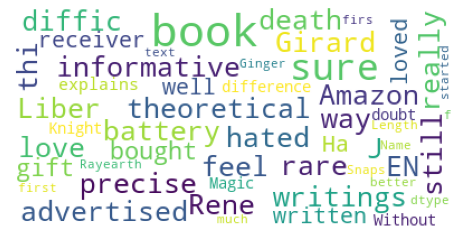

In [ ]:
!pip install wordcloud
import matplotlib as mpl

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(8.0,8.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=50, max_font_size=40, random_state=42).generate(str(df_clean))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [ ]:
# Split Data to train & test Topic Models
train_docs, test_docs = train_test_split(train, 
                                         stratify=train.author, 
                                         test_size=50, 
                                         random_state=42)

In [ ]:
train.head()

In [ ]:
vectorizer = TfidfVectorizer(max_df=.5, 
                             min_df=.001, 
                             stop_words='english')

train_dtm = vectorizer.fit_transform(train["text_cleaning"])
words = vectorizer.get_feature_names()
train_dtm

In [ ]:
len(words)

In [ ]:
n_components = 3
topic_labels = ['Topic {}'.format(i) for i in range(1, n_components+1)]

In [ ]:
lda_base = LatentDirichletAllocation(n_components=n_components,
                                     n_jobs=-1,
                                     learning_method='batch',
                                     max_iter=20)
lda_base.fit(train_dtm)

In [ ]:
# pseudo counts
topics_count = lda_base.components_
print(topics_count.shape)
topics_count[:3]

In [ ]:
topics_prob = topics_count / topics_count.sum(axis=1).reshape(-1, 1)
topics = pd.DataFrame(topics_prob.T,
                      index=words,
                      columns=topic_labels)
topics.head()

In [ ]:
top_words = {}
for topic, words_ in topics.items():
    top_words[topic] = words_.nlargest(20).index.tolist()
pd.DataFrame(top_words)

In [ ]:
train_preds = lda_base.transform(train_dtm)
train_preds.shape

In [ ]:
train_eval = pd.DataFrame(train_preds, columns=topic_labels, index=train.author)
train_eval.sample(n=3)

In [ ]:
df = train_eval.groupby(level='author').idxmax(
    axis=1).reset_index(-1, drop=True)
sns.heatmap(df.groupby(level='author').value_counts(normalize=True)
            .unstack(-1), annot=True, fmt='.1%', cmap='Blues', square=True)
plt.title('Train Data: Topic Assignments')

**RNN**

In [ ]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

**Read the text column and convert into a text corpus**

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("/kaggle/input/spooky-author-identification/train.csv")
df.head()

In [ ]:
# text = []

# for row in df["text"][df["author"] == "EAP"]:
#     text.append(str(row))
    
# corpusEAP = " ".join(text)
# corpusEAP = corpusEAP[0:100000]

**Tokenize and Clean Tex**

In [ ]:
# len(corpusEAP)

In [ ]:
import spacy
nlp = spacy.load('en',disable=['parser', 'tagger','ner']) # only for tokenisation

In [ ]:
def separate_punc(doc_text):
    return [token.text.lower() for token in nlp(doc_text) if token.text not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n ']

In [ ]:
tokens = separate_punc(corpusEAP)
len(tokens)

**Create Sequences of Tokens¶**

In [ ]:
# organize into sequences of tokens
train_len = 25+1

# Empty list of sequences
text_sequences = []

for i in range(train_len, len(tokens)):
    
    # Grab train_len# amount of characters
    seq = tokens[i-train_len:i]
    
    # Add to list of sequences
    text_sequences.append(seq)

In [ ]:
print (' '.join(text_sequences[0]))
print (' '.join(text_sequences[1]))

In [ ]:
len(text_sequences)

**Keras Tokenization**

In [ ]:
from keras.preprocessing.text import Tokenizer
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)
print (sequences[0])

In [ ]:
# print (tokenizer.index_word)
# print ()
# print (" --------------------- ")
# print (len(tokenizer.word_counts))

**Convert to Numpy Matrix**

In [ ]:
sequences = np.array(sequences)
sequences[0]

**Train / Test Split**

In [ ]:
X = sequences[:,:-1]
y = sequences[:,-1]

In [ ]:
References:
  -   S. Bird, Natural (2009) language processing(NLP) with Python, O'Reilly Book
  -  https://www.coursera.org/specializations/deep-learning
  -  https://www.coursera.org/specializations/natural-language-processing